# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos Quiles

Discente:
- Camila Sales

## Atividade

- Realizar testes com 3(ou mais) datasets selecionados do repositório da UCI (iris, etc...) para várias configuração da rede
- Ilustrar graficamente o processo de aprendizagem pela redução do erro quadrático médio
- Dividir o conjunto em duas partes (Treino e Validação)
- Entregar um relatório descrevendo os experimentos

#### Datasets selecionados
 - Detecção de ocupação https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
 - Padrão de clientes de cartão de crédito https://archive.ics.uci.edu/ml/machine-learning-databases/00350/
 - Avila https://archive.ics.uci.edu/ml/datasets/Avila

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot.keras import PlotLossesCallback
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                            normalize=False,
                            title=None,
                            cmap=plt.cm.Blues):
        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
        classes = classes[unique_labels(y_true, y_pred)]

        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=title,
            ylabel='Classe real',
            xlabel='Classe prevista')
        
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        ax.plot()
        return ax


In [3]:
df = pd.read_csv( "./data/occupancy_data/datatest2.txt", sep="," );
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [4]:
X = df.drop(['Occupancy','date'],axis=1)
y = df['Occupancy'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [5]:
teste = np.zeros((len(y_test), 1))
i=0   
for lista in teste:
    lista[0] = y_test[i]
    i = i+1 
y_test = teste
y_test.shape

teste = np.zeros((len(y_train), 1))
i=0   
for lista in teste:
    lista[0] = y_train[i]
    i = i+1 
y_train = teste

In [6]:
plot_losses = PlotLossesCallback()

In [7]:
model = Sequential()

model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(momentum=0.9, nesterov=True)


model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy','mean_squared_error'
])

Instructions for updating:
Colocations handled automatically by placer.


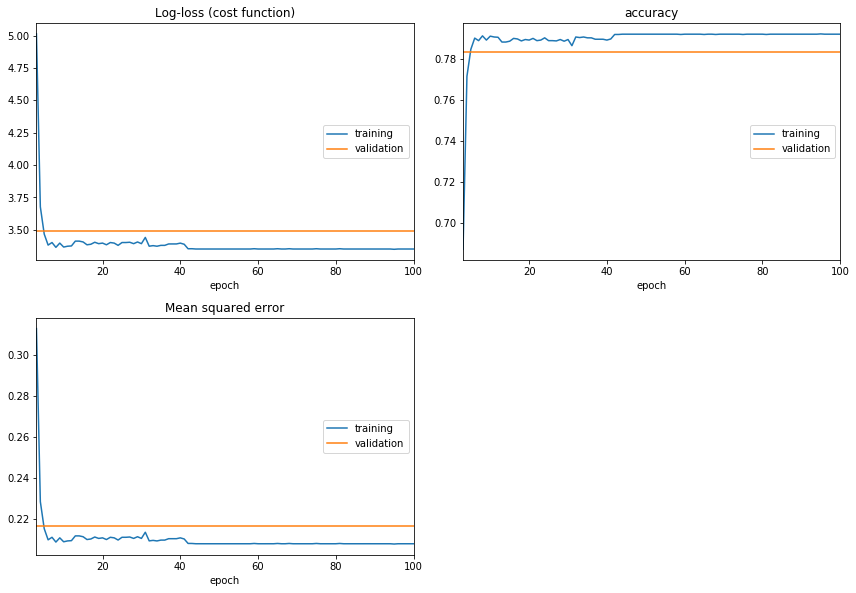

Log-loss (cost function):
training   (min:    3.350, max:   12.603, cur:    3.352)
validation (min:    3.491, max:   12.490, cur:    3.491)

accuracy:
training   (min:    0.209, max:    0.792, cur:    0.792)
validation (min:    0.217, max:    0.783, cur:    0.783)

Mean squared error:
training   (min:    0.208, max:    0.791, cur:    0.208)
validation (min:    0.217, max:    0.783, cur:    0.217)
2438/2438 [==============================] - 0s 5us/step


In [8]:
history = model.fit(X_train, y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[plot_losses],
          verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128)

In [9]:
def loss_plot(history):
    train_acc = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize = (9,5))
    plt.plot(np.arange(1,201), train_acc, marker = 'D', label = 'Loss Accuracy')
    plt.plot(np.arange(1,201), val_acc, marker = 'o', label = 'Loss Accuracy')

    plt.xlabel('epocas')
    plt.ylabel('acuracia')
    plt.plot('Train/Validation')
    plt.legend()
    plt.margins(0.02)
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (200,) and (100,)

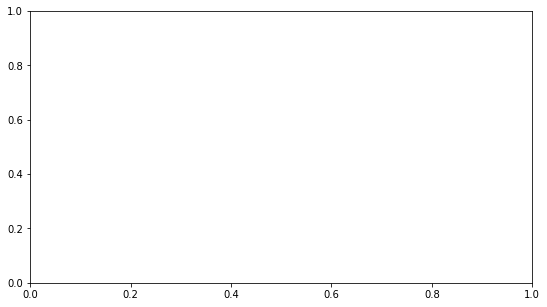

In [10]:
loss_plot(history)